In [17]:
from vision import Vision
from globalPlanning import GlobalPlanning
from localPlanning import LocalPlanning
from thymioControl import ThymioControl
from plotter import Plotter

import numpy as np

In [18]:
vision = Vision()
globalPlanning = GlobalPlanning()
localPlanning = LocalPlanning()
thymio = ThymioControl()
plotter = Plotter()

In [19]:
globalPlanning = GlobalPlanning()
matrix = np.zeros((20, 30))
matrix[1:6, 9:11] = -1; matrix[11, 1] = -1; matrix[10:17, 17:26] = -1
start = (1, 1)
goal = (19, 28)
plotter.set_map(matrix, start, goal)
if start == None:
    print("No start found")
elif goal == None:
    print("No goal found")
else:
    #path, matrix2 = globalPlanning.dijkstra(vision.get_matrix(), vision.get_start(), vision.get_goal)
    path, matrix2 = globalPlanning.dijkstra(matrix.copy(), start, goal)

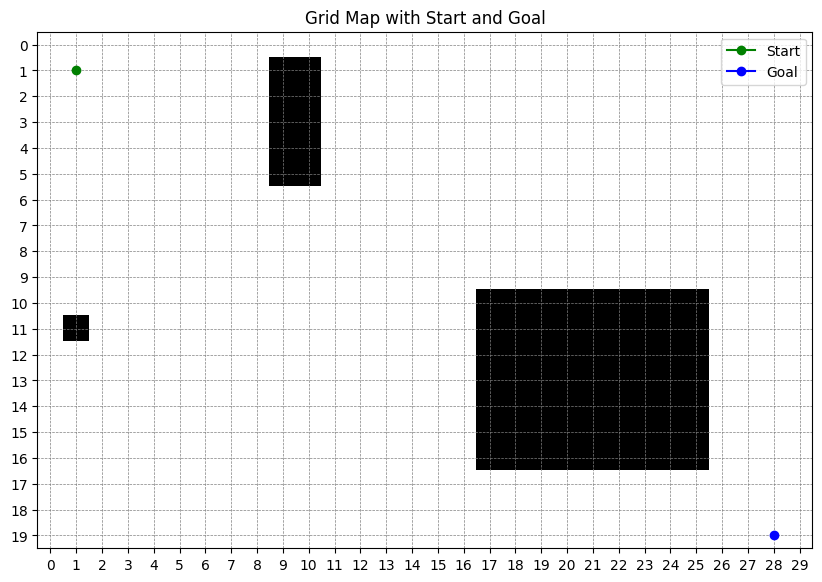

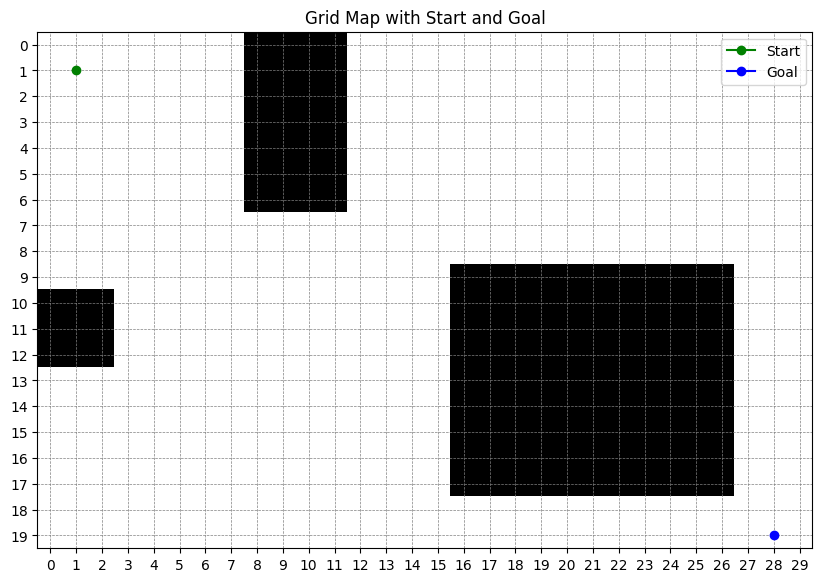

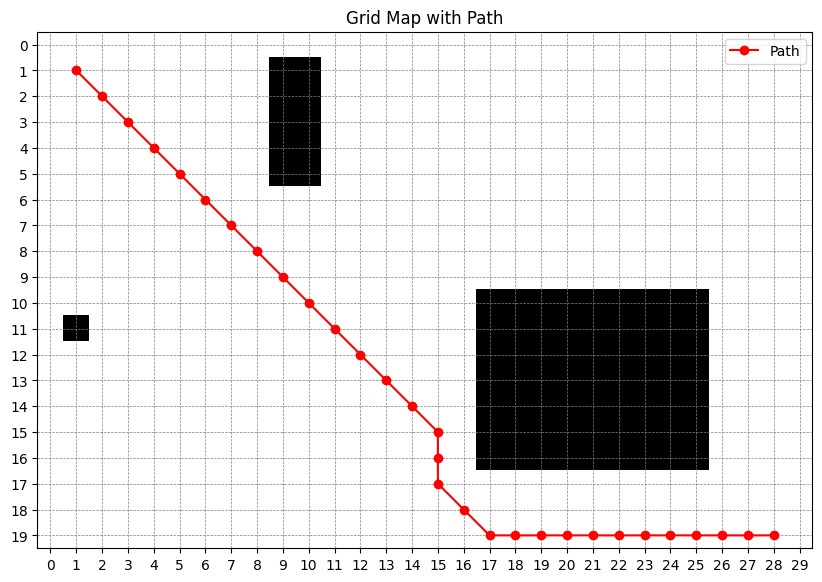

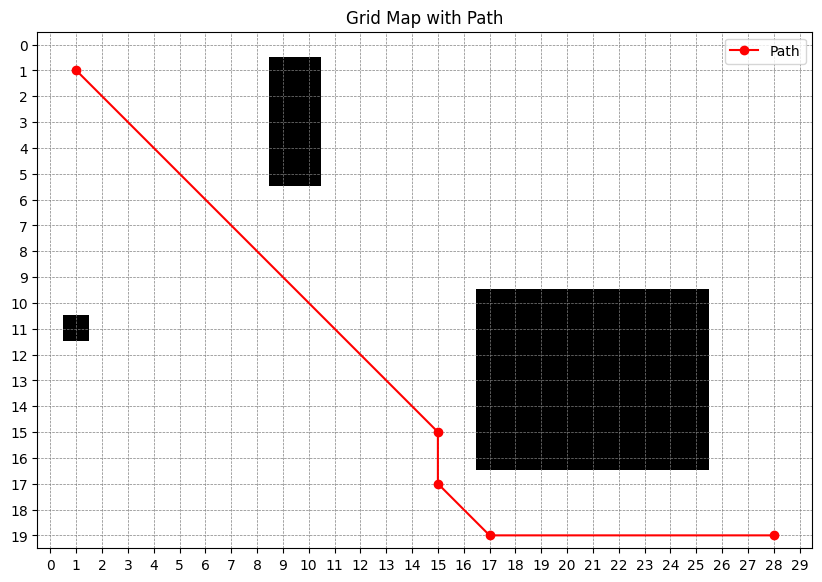

In [20]:
plotter.plot_map()
plotter.plot_map_given(matrix2, start, goal)
plotter.plot_path(path)
thymio.set_path(path.copy())
path2 = thymio.get_path()
plotter.plot_path(path2)